In [51]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import codecs
import csv
import datetime
from copy import deepcopy
import pickle
import seaborn as sns
get_ipython().magic('matplotlib inline')
%matplotlib inline 
plt.style.use("seaborn-poster") 

In [179]:
liinid = pd.read_csv('liinide_info.csv', sep=";")
liinid

,Liin,Väljumised ETKN,Väljumised R,Väljumised L,Väljumised P,Peatuste arv
0,1,88,91,51,48,33
1,2,86,87,47,46,25
2,3,53,53,46,46,45
3,4,88,90,51,49,38
4,5,9,9,9,9,29
5,6,66,66,46,46,48
6,7,51,51,47,47,41
7,8,48,48,46,46,41
8,9,8,8,7,7,54
9,9A,6,6,6,6,55


In [3]:
data =  pd.read_csv('puhastatud.csv', sep=",")

In [22]:
data = data.drop(data.columns[[0]],axis=1)

In [5]:
data.departure_time = pd.to_timedelta(data.departure_time, unit='sec')
data.new_estimated_departure_time = pd.to_timedelta(data.new_estimated_departure_time, unit='sec')
data.new_deviation =  pd.to_timedelta(data.new_deviation, unit='sec')

In [4]:
peatused = pd.read_excel('Tartu bussipeatused.xlsx', sep=";")

In [23]:
data

,route_short_name,a_date,trip_departure_time,trip_id,stop_sequence,stop_id,stop_name,departure_time,stop_code,varem_hiljem,new_estimated_departure_time,new_deviation,wd
0,12,2019-09-14,15:30:00,2386227,8,2074852,Jõe,15:41:00,7820057-1,2,15:44:20,00:03:20,5
1,4,2019-09-14,15:25:00,2386131,11,2074807,Kesklinn I,15:37:00,7820039-1,2,15:40:27,00:03:27,5
2,2,2019-09-14,15:25:00,2387410,23,2074813,Annelinna keskus,15:59:00,7820015-1,2,16:02:06,00:03:06,5
3,9A,2019-09-14,15:25:00,2386325,8,2074962,Kesklinn VI,15:38:00,7820084-1,2,15:42:01,00:04:01,5
4,9A,2019-09-14,15:25:00,2386325,9,2074868,Riiamäe,15:39:00,7820219-1,2,15:43:13,00:04:13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278283,10,2019-10-18,07:36:00,2386761,11,2074810,Kaare,07:45:00,7820061-1,2,07:50:44,00:05:44,4
278284,10,2019-10-18,07:36:00,2386761,12,2074830,Pauluse,07:47:00,7820178-1,2,07:54:41,00:07:41,4
278285,10,2019-10-18,07:36:00,2386761,26,2074814,Annelinna keskus,08:09:00,7820014-1,2,08:16:47,00:07:47,4
278286,2,2019-10-18,07:35:00,2387251,15,2074811,Kesklinn II,07:58:00,7820088-1,2,08:01:19,00:03:19,4


In [166]:
peatuste_kaupa = pd.DataFrame(data.groupby(['stop_code',"stop_name",'varem_hiljem'], as_index=False)["wd"].count())
peatuste_kaupa = peatuste_kaupa.sort_values(by=["wd","stop_code"], ascending=False)


In [141]:
peatuste_kaupa.describe()

,varem_hiljem,wd
count,682.000000,682.000000
mean,1.500000,408.046921
std,0.500367,486.938475
min,1.000000,1.000000
25%,1.000000,94.000000
50%,1.500000,223.500000
75%,2.000000,529.500000
max,2.000000,2940.000000


In [125]:
pt_nimi = data[["stop_code","stop_name"]]
pt_nimi

,stop_code,stop_name
0,7820057-1,Jõe
1,7820039-1,Kesklinn I
2,7820015-1,Annelinna keskus
3,7820084-1,Kesklinn VI
4,7820219-1,Riiamäe
...,...,...
278283,7820061-1,Kaare
278284,7820178-1,Pauluse
278285,7820014-1,Annelinna keskus
278286,7820088-1,Kesklinn II


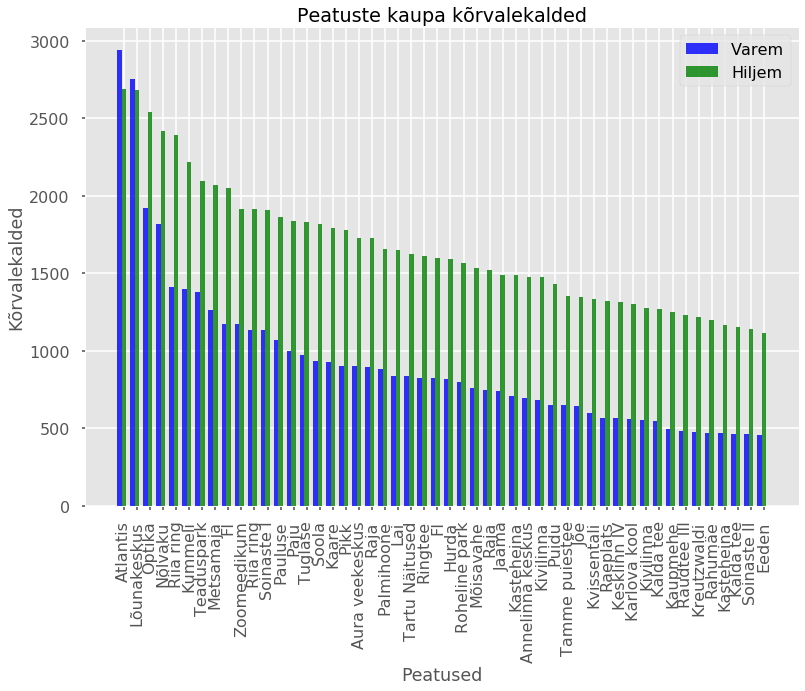

In [167]:



# data to plot
n_groups = len(peatuste_kaupa[(peatuste_kaupa.varem_hiljem == 1)][:50])
varem = peatuste_kaupa[(peatuste_kaupa.varem_hiljem == 1)]["wd"][:50]
hiljem = peatuste_kaupa[(peatuste_kaupa.varem_hiljem == 2)]["wd"][:50]



xlabel = peatuste_kaupa[(peatuste_kaupa.varem_hiljem == 1)]["stop_name"][:50]


# create plot
fig, ax = plt.subplots()


index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, varem, bar_width,
alpha=opacity,
color='b',
label='Varem')

rects2 = plt.bar(index + bar_width, hiljem, bar_width,
alpha=opacity,
color='g',
label='Hiljem')


plt.xlabel('Peatused')
plt.ylabel('Kõrvalekalded')
plt.title('Peatuste kaupa kõrvalekalded')
plt.xticks(rotation=90)
plt.xticks(index + bar_width, xlabel)
plt.legend()

#plt.tight_layout()

plt.show()



In [299]:
pd.set_option('display.max_rows',700)
peatuste_kaupa

,stop_code,stop_name,varem_hiljem,wd
60,7820020-1,Atlantis,1,2940
270,7820139-3,Lõunakeskus,1,2752
51,7820015-1,Annelinna keskus,2,2689
421,7820219-1,Riiamäe,2,2681
479,7820255-1,Sõpruse puiestee,2,2542
248,7820126-1,Lembitu,2,2421
35,7820007-1,Aida,2,2396
557,7820301-1,Vene,2,2216
313,7820166-1,Nõlvaku,2,2096
335,7820177-1,Pauluse,2,2071


In [300]:
data[data["stop_code"] == '7820301-1']

,route_short_name,a_date,trip_departure_time,trip_id,stop_sequence,stop_id,stop_name,departure_time,stop_code,varem_hiljem,new_estimated_departure_time,new_deviation,wd
11,4,2019-09-14,15:25:00,2386131,13,2074950,Vene,15:39:00,7820301-1,2,15:43:12,00:04:12,5
122,4,2019-09-14,15:05:00,2386038,13,2074950,Vene,15:19:00,7820301-1,2,15:23:13,00:04:13,5
204,8,2019-09-14,15:06:00,2385992,33,2074950,Vene,15:52:00,7820301-1,2,15:58:29,00:06:29,5
231,4,2019-09-14,16:25:00,2386178,13,2074950,Vene,16:39:00,7820301-1,2,16:42:13,00:03:13,5
273,4,2019-09-14,16:45:00,2386100,13,2074950,Vene,16:59:00,7820301-1,2,17:02:32,00:03:32,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277387,7,2019-10-18,06:55:00,2386624,15,2074950,Vene,07:08:00,7820301-1,2,07:16:24,00:08:24,4
277425,8,2019-10-18,07:00:00,2386725,33,2074950,Vene,07:56:00,7820301-1,2,08:01:29,00:05:29,4
277749,9A,2019-10-18,07:55:00,2386986,34,2074950,Vene,08:49:00,7820301-1,2,08:53:11,00:04:11,4
278189,4,2019-10-18,07:43:00,2386570,13,2074950,Vene,08:00:00,7820301-1,2,08:05:23,00:05:23,4


In [303]:
len(data["stop_id"].unique())

342

In [301]:
data[data["stop_code"] == '7820301-1'][["stop_sequence","route_short_name"]].drop_duplicates()

,stop_sequence,route_short_name
11,13,4
204,33,8
456,15,7
3278,34,9A
67447,15,8
71816,8,9A


In [275]:
liininr = data["route_short_name"].sort_values().unique()
liininr

array(['1', '10', '11', '12', '13', '2', '21', '22', '25', '3', '4', '5',
       '6', '69', '7', '8', '9', '9A', 'E1'], dtype=object)

In [216]:
kuupäevad = data["a_date"].unique()

In [194]:
liinitripid = {}

for el in liininr:
    liinitripid[el] = data[(data["route_short_name"] == el)]["trip_id"].unique()

In [235]:
data[(data["route_short_name"] == '1') & (data["wd"] == 6) & (data["trip_departure_time"] == "16:09:00")]["a_date"].unique()

array(['2019-09-15', '2019-09-22', '2019-09-29', '2019-10-06'],
      dtype=object)

In [238]:
E = set(data[(data["route_short_name"] == '1') & (data["wd"] == 0)]["trip_id"].unique())
T = set(data[(data["route_short_name"] == '1') & (data["wd"] == 1)]["trip_id"].unique())
K = set(data[(data["route_short_name"] == '1') & (data["wd"] == 2)]["trip_id"].unique())
N = set(data[(data["route_short_name"] == '1') & (data["wd"] == 3)]["trip_id"].unique())

print("E-T: ", E-T)
print("T-E: ", T-E)

E-T:  set()
T-E:  set()


In [252]:
df = data.copy()
df = df.sort_values(by="departure_time")

In [276]:
df = df.sort_values(by="stop_sequence", ascending=False)
peatusedliinil = df[["route_short_name","stop_sequence"]].drop_duplicates()


In [277]:
peatusedliinil[peatusedliinil["route_short_name"] == '1']

,route_short_name,stop_sequence
164187,1,18
115288,1,17
101648,1,16
269225,1,15
79746,1,14
167971,1,13
122155,1,12
109935,1,11
120932,1,10
177673,1,9


In [270]:
#for el in liinitripid["1"]:
#    for k in kuupäevad:
        
       # if len(

#NR1_peatused = df[(df["route_short_name"] == '1')][["stop_code","stop_name"]].drop_duplicates()
#NR1_peatused

In [242]:
len(NR1_peatused)

33

In [264]:
liini_peatused = data[(data["trip_id"] == liinitripid['1'][10]) & (data["varem_hiljem"]==1)]
liini_peatused

,route_short_name,a_date,trip_departure_time,trip_id,stop_sequence,stop_id,stop_name,departure_time,stop_code,varem_hiljem,new_estimated_departure_time,new_deviation,wd
5546,1,2019-09-14,14:09:00,2385712,18,2074875,FI,14:36:00,7820035-2,1,14:34:40,00:01:20,5
5548,1,2019-09-14,14:09:00,2385712,17,2074874,Teaduspark,14:34:00,7820276-1,1,14:33:38,00:00:22,5
5563,1,2019-09-14,14:09:00,2385712,16,2074873,Riia ring,14:33:00,7820217-1,1,14:32:22,00:00:38,5
8797,1,2019-09-15,14:09:00,2385712,16,2074873,Riia ring,14:33:00,7820217-1,1,14:31:34,00:01:26,6
8798,1,2019-09-15,14:09:00,2385712,17,2074874,Teaduspark,14:34:00,7820276-1,1,14:33:07,00:00:53,6
8817,1,2019-09-15,14:09:00,2385712,14,2074871,Soinaste II,14:30:00,7820242-1,1,14:29:25,00:00:35,6
8818,1,2019-09-15,14:09:00,2385712,12,2074870,Lembitu,14:27:00,7820126-1,1,14:26:38,00:00:22,6
8819,1,2019-09-15,14:09:00,2385712,8,2074816,Atlantis,14:21:00,7820020-1,1,14:19:42,00:01:18,6
8820,1,2019-09-15,14:09:00,2385712,7,2074866,Pikk,14:19:00,7820187-1,1,14:17:57,00:01:03,6
8826,1,2019-09-15,14:09:00,2385712,18,2074875,FI,14:36:00,7820035-2,1,14:34:05,00:01:55,6


In [184]:
liinide_peatuste_kaupa = pd.DataFrame(data.groupby(['route_short_name','a_date','trip_id','stop_code',"stop_name","varem_hiljem"], as_index=False))
liinide_peatuste_kaupa

,0,1
0,"(1, 2019-09-14, 2385674, 7820015-1, Annelinna ...",route_short_name a_date trip_departu...
1,"(1, 2019-09-14, 2385674, 7820027-1, Eeden, 1)",route_short_name a_date trip_departu...
2,"(1, 2019-09-14, 2385674, 7820063-1, Kalda tee, 1)",route_short_name a_date trip_departu...
3,"(1, 2019-09-14, 2385674, 7820067-1, Kanali, 1)",route_short_name a_date trip_departu...
4,"(1, 2019-09-14, 2385674, 7820088-1, Kesklinn I...",route_short_name a_date trip_departu...
...,...,...
278019,"(E1, 2019-10-16, 2387000, 7820088-1, Kesklinn ...",route_short_name a_date trip_depar...
278020,"(E1, 2019-10-17, 2386999, 7800431-1, Lennujaam...",route_short_name a_date trip_depar...
278021,"(E1, 2019-10-17, 2387000, 7820061-1, Kaare, 1)",route_short_name a_date trip_depar...
278022,"(E1, 2019-10-17, 2387000, 7820088-1, Kesklinn ...",route_short_name a_date trip_depar...
